# Importing Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Building Algorithm

In [220]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta_vector = np.array([])
    
    def fit(self, x, y):
        x['x0'] = np.ones((x.shape[0]))
        col_i = list(x.columns)
        cols = ['x0'] + col_i[:-1]
        x = x[cols]

        X = np.array([list(i) for i in list(x.values)])
        self.theta_vector = np.zeros((len(X[0]), 1))
        Y = np.array(y)
        Y = Y.reshape((Y.size, 1))

        m = Y.size

        for _ in range(self.epochs):
            predictions = np.matmul(X, self.theta_vector)

            errors = predictions - Y

            self.theta_vector = self.theta_vector - (self.learning_rate/m)*np.matmul(X.T, errors)
    
    def predict(self, x_test):
        x_test['x0'] = np.ones((x_test.shape[0]))
        x_test_cols_i = list(x_test.columns)
        x_test_cols = ['x0'] + x_test_cols_i[:-1]
        x_test = x_test[x_test_cols]

        X = np.array([list(i) for i in list(x_test.values)])

        predictions = np.matmul(X, self.theta_vector)

        return(predictions)

# Making Prediction and testing

In [254]:
model = MultivariateLinearRegression(0.05, 1000)

In [255]:
df = pd.read_csv('Multivariate_Linear_Regression.csv')

In [256]:
df.head()

,X1,X2,X3,X4,y
0,20.631730,12.867703,8.395460,13.990905,189.031908
1,4.101116,5.433219,3.563688,7.586737,65.410833
2,11.924915,-4.457952,4.307833,-3.869729,34.669369
3,33.079571,13.541840,0.573275,5.720989,189.053144
4,23.595950,14.390700,2.435688,28.890003,215.060877


In [257]:
X_train = df.drop(columns='y')
Y_train = df['y']

# Applying Feature Scaling

In [258]:
cols_list = list(X_train.columns)
for col in cols_list:
    mean = X_train[col].mean()
    maxi = X_train[col].max()
    mini = X_train[col].min()
    r = maxi - mini
    X_train[col] = (X_train[col] - mean)/r

X_train.head()

,X1,X2,X3,X4
0,-0.036956,-0.055399,0.171494,0.039037
1,-0.337649,-0.241290,-0.070188,-0.143945
2,-0.195334,-0.488608,-0.032966,-0.471281
3,0.189470,-0.038543,-0.219766,-0.197253
4,0.016963,-0.017319,-0.126609,0.464736


In [259]:
model.fit(X_train, Y_train)

In [260]:
x = X_train.head(1)

In [261]:
x = x.drop(columns='x0')
x

,X1,X2,X3,X4
0,-0.036956,-0.055399,0.171494,0.039037


In [262]:
prediction = model.predict(x)

In [263]:
prediction

array([[194.9741171]])

In [264]:
print(prediction, Y_train[0])

[[194.9741171]] 189.03190793437685


# Plotting the results

In [265]:
df.head()

,X1,X2,X3,X4,y
0,20.631730,12.867703,8.395460,13.990905,189.031908
1,4.101116,5.433219,3.563688,7.586737,65.410833
2,11.924915,-4.457952,4.307833,-3.869729,34.669369
3,33.079571,13.541840,0.573275,5.720989,189.053144
4,23.595950,14.390700,2.435688,28.890003,215.060877


In [266]:
X1 = np.array(X_train['X1'])
X2 = np.array(X_train['X2'])
X3 = np.array(X_train['X3'])
X4 = np.array(X_train['X4'])


In [267]:
y = np.array(df['y'])
y_p_1 = (model.theta_vector[1] * X1) + model.theta_vector[0]
y_p_2 = (model.theta_vector[2] * X2) + model.theta_vector[0]
y_p_3 = (model.theta_vector[3] * X3) + model.theta_vector[0]
y_p_4 = (model.theta_vector[4] * X4) + model.theta_vector[0]

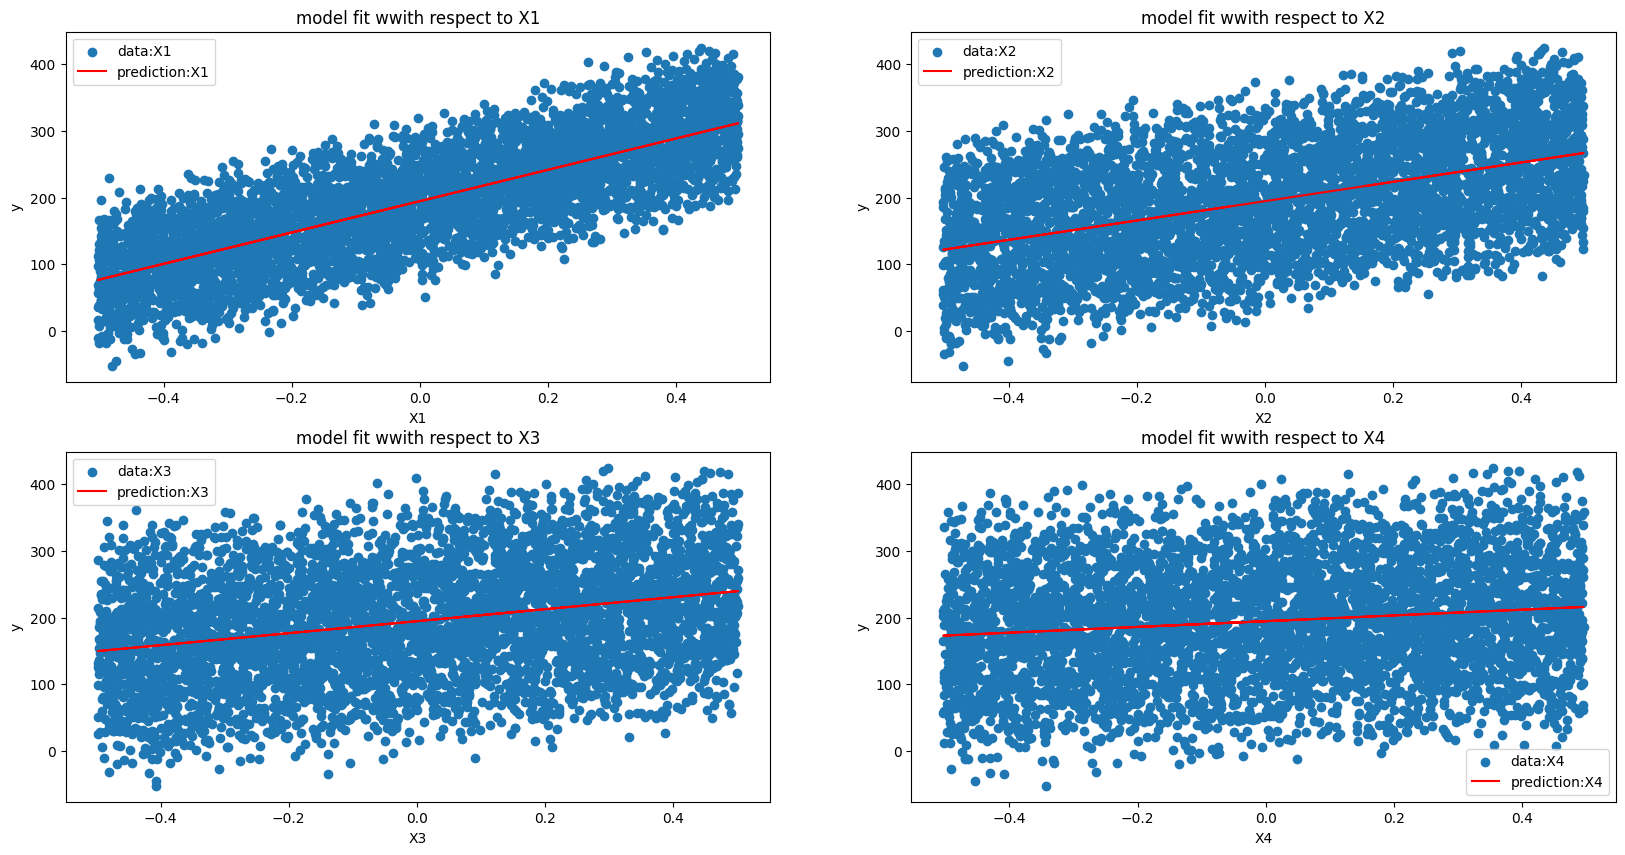

In [269]:
fig, ax = plt.subplots(2,2, figsize = (20,10))
ax[0,0].scatter(X1, y, label='data:X1')
ax[0,1].scatter(X2, y, label='data:X2')
ax[1,0].scatter(X3, y, label='data:X3')
ax[1,1].scatter(X4, y, label='data:X4')

ax[0,0].plot(X1, y_p_1, color='red', label='prediction:X1')
ax[0,1].plot(X2, y_p_2, color='red', label='prediction:X2')
ax[1,0].plot(X3, y_p_3, color='red', label='prediction:X3')
ax[1,1].plot(X4, y_p_4, color='red', label='prediction:X4')

ax[0,0].set_xlabel('X1')
ax[0,0].set_ylabel('y')
ax[0,0].set_title('model fit wwith respect to X1')
ax[0,0].legend()

ax[0,1].set_xlabel('X2')
ax[0,1].set_ylabel('y')
ax[0,1].set_title('model fit wwith respect to X2')
ax[0,1].legend()

ax[1,0].set_xlabel('X3')
ax[1,0].set_ylabel('y')
ax[1,0].set_title('model fit wwith respect to X3')
ax[1,0].legend()

ax[1,1].set_xlabel('X4')
ax[1,1].set_ylabel('y')
ax[1,1].set_title('model fit wwith respect to X4')
ax[1,1].legend()

# Success : )